### Preprocess data files.

In [2]:
# importing all the required libries for preprocessing.

import pandas as pd
import glob, os, time
import helper

In [3]:
## Helper is a development library for quickly writing configurable applications and daemons
helper.clean_niti_data('./CSV/')

Processed 0 files in 0.0025730133056640625 seconds


In [4]:
## The glob module, which is short for global, is a function that's used to search for files that match a specific file pattern or name
##  It can be used to search CSV files and for text in files.
files = glob.glob('csv')

In [5]:
files = glob.glob('./PROCESSED/*.csv')

## Read all the files

In [6]:
data = [pd.read_csv(file) for file in files]

In [7]:
data[0].tail()

,State,1980-81,1981-82,1982-83,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,...,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
27,Uttarakhand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-637.0,-240.0,1170.0,10.0,-720.0,-1790.0,-1100.0,-2160.0,-40.0,NaN
28,West Bengal,23.0,87.8,242.4,206.2,371.9,-82.9,188.0,115.0,137.2,...,8147.0,14710.0,21580.0,17270.0,14570.0,13820.0,18920.0,10360.0,0.0,NaN
29,All States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Delhi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5142.0,-4590.0,-6550.0,-10640.0,-4430.0,-4900.0,-5610.0,-6100.0,-8160.0,NaN
31,Puducherry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.0,110.0,240.0,340.0,450.0,-90.0,180.0,-90.0,0.0,NaN


In [8]:
## The del keyword is used to delete objects.

del data

### Make the Data Set

In [9]:
## here we have a folder named processed in jupyter notebook and here inside it we have 13 csv file and here we use
## glob function to search for these files.

files = glob.glob('./PROCESSED/*.csv')
files

['./PROCESSED/Revenue_Deficits.csv',
 './PROCESSED/Fiscal_Deficits.csv',
 './PROCESSED/Revenue_Receipts.csv',
 './PROCESSED/Interest_Payments.csv',
 './PROCESSED/Aggregate_Receipts.csv',
 './PROCESSED/Own_Tax_Revenues.csv',
 './PROCESSED/Capital_Expenditure.csv',
 './PROCESSED/Capital_Receipts.csv',
 './PROCESSED/Revenue_Expenditure.csv',
 './PROCESSED/Outstanding_Liabilities.csv',
 './PROCESSED/Aggregate_Expenditure.csv',
 './PROCESSED/Nominal_GSDP_Series.csv',
 './PROCESSED/Social_Sector_Expenditure.csv']

In [10]:
feature_files = ['./PROCESSED/Capital_Receipts.csv',
 './PROCESSED/Aggregate_Receipts.csv',
 './PROCESSED/Social_Sector_Expenditure.csv',
 './PROCESSED/Interest_Payments.csv',
 './PROCESSED/Own_Tax_Revenues.csv',
 './PROCESSED/Fiscal_Deficits.csv',
 './PROCESSED/Outstanding_Liabilities.csv',
 './PROCESSED/Aggregate_Expenditure.csv',
 './PROCESSED/Revenue_Receipts.csv',
 './PROCESSED/Revenue_Expenditure.csv',
 './PROCESSED/Revenue_Deficits.csv',
 './PROCESSED/Capital_Expenditure.csv']

In [11]:
target_file = './PROCESSED/Nominal_GSDP_Series.csv'

## Features File

In [12]:
finalDF = pd.DataFrame()
for file in feature_files:
    colname = os.path.splitext(os.path.basename(file))[0]
    
    mydata = pd.read_csv(file)
    mydata = mydata.drop(29)
    
    series = pd.Series([])
    for col in mydata.iloc[:, 1:-1]:
        series = series._append(pd.Series(mydata[col].values), ignore_index=True)
    finalDF[colname] = series

In [13]:
finalDF.head()

,Capital_Receipts,Aggregate_Receipts,Social_Sector_Expenditure,Interest_Payments,Own_Tax_Revenues,Fiscal_Deficits,Outstanding_Liabilities,Aggregate_Expenditure,Revenue_Receipts,Revenue_Expenditure,Revenue_Deficits,Capital_Expenditure
0,325.0,1590.0,532.0,81.7,582.0,222.1,81.50,1610.0,1265.0,1161.0,-104.0,449.0
1,NaN,NaN,NaN,NaN,NaN,NaN,2.80,NaN,NaN,NaN,NaN,NaN
2,187.0,709.0,171.0,30.0,66.0,-27.4,43.41,758.0,522.0,357.0,-165.0,401.0
3,702.0,1690.0,452.0,107.1,277.0,335.8,106.33,1791.0,988.0,929.0,-59.0,862.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Target

In [14]:
file = target_file
colname = os.path.splitext(os.path.basename(file))[0]

mydata = pd.read_csv(file)
mydata = mydata.drop(31)

series = pd.Series([])
for col in mydata.iloc[:, 1:-1]:
    series = series._append(pd.Series(mydata[col].values), ignore_index=True)

finalDF[colname] = series

In [15]:
finalDF.head()

,Capital_Receipts,Aggregate_Receipts,Social_Sector_Expenditure,Interest_Payments,Own_Tax_Revenues,Fiscal_Deficits,Outstanding_Liabilities,Aggregate_Expenditure,Revenue_Receipts,Revenue_Expenditure,Revenue_Deficits,Capital_Expenditure,Nominal_GSDP_Series
0,325.0,1590.0,532.0,81.7,582.0,222.1,81.50,1610.0,1265.0,1161.0,-104.0,449.0,8191.0
1,NaN,NaN,NaN,NaN,NaN,NaN,2.80,NaN,NaN,NaN,NaN,NaN,107.0
2,187.0,709.0,171.0,30.0,66.0,-27.4,43.41,758.0,522.0,357.0,-165.0,401.0,2516.0
3,702.0,1690.0,452.0,107.1,277.0,335.8,106.33,1791.0,988.0,929.0,-59.0,862.0,7353.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
finalDF = finalDF.dropna()

In [17]:
finalDF.to_csv('NITIDATA.csv', index=False)

## Clean data

In [18]:
import helper, glob, os, time

In [19]:
helper.batch_convert('./XLSX', row_start=3, row_end=35)

DONE ! Processed 0 files in 0.001087188720703125 seconds 
Output Directory : /Users/manavanandani/CSV


## Creating the dataFrame and its features.

In [20]:
import pandas as pd
import numpy as np

In [21]:
# Here we created a data frame named niti and read the csv file in it.
niti = pd.read_csv('NITIDATA.csv')

In [22]:
# this head function is used to print the some upper rows of the dataset.
niti.head()

,Capital_Receipts,Aggregate_Receipts,Social_Sector_Expenditure,Interest_Payments,Own_Tax_Revenues,Fiscal_Deficits,Outstanding_Liabilities,Aggregate_Expenditure,Revenue_Receipts,Revenue_Expenditure,Revenue_Deficits,Capital_Expenditure,Nominal_GSDP_Series
0,325.0,1590.0,532.0,81.7,582.0,222.1,81.50,1610.0,1265.0,1161.0,-104.0,449.0,8191.0
1,187.0,709.0,171.0,30.0,66.0,-27.4,43.41,758.0,522.0,357.0,-165.0,401.0,2516.0
2,702.0,1690.0,452.0,107.1,277.0,335.8,106.33,1791.0,988.0,929.0,-59.0,862.0,7353.0
3,345.0,1370.0,406.0,68.6,531.0,246.5,80.76,1442.0,1025.0,903.0,-122.0,539.0,7427.0
4,116.0,576.0,137.0,37.0,234.0,112.0,30.76,607.0,460.0,401.0,-59.0,207.0,3386.0


In [23]:
# this tail function is used to print the some of the bottom row from the dataset.
niti.tail()

,Capital_Receipts,Aggregate_Receipts,Social_Sector_Expenditure,Interest_Payments,Own_Tax_Revenues,Fiscal_Deficits,Outstanding_Liabilities,Aggregate_Expenditure,Revenue_Receipts,Revenue_Expenditure,Revenue_Deficits,Capital_Expenditure,Nominal_GSDP_Series
655,22914.0,68263.0,20141.0,9100.0,18860.0,10080.0,4067.4,59839.0,45349.0,46617.0,1268.0,13222.0,293172.0
656,2445.0,7982.0,2781.0,810.0,1790.0,1880.0,390.1,7664.0,5537.0,5611.0,74.0,2053.0,29968.0
657,19349.0,43075.0,11445.0,9750.0,10390.0,9600.0,3056.2,40587.0,23726.0,31117.0,7391.0,9471.0,230245.0
658,10844.0,21688.0,4566.0,1670.0,8940.0,-250.0,353.0,11142.0,10844.0,6515.0,-4328.0,4626.0,115374.0
659,1802.0,3604.0,797.0,170.0,480.0,280.0,76.0,2173.0,1802.0,1794.0,-7.0,379.0,7977.0


In [24]:
# this will describe all the properties related to the data set like count, mean, standard deviation and all. this 'T' it does this horizontally. it helps to print this verticall and without 'T'
niti.describe().T

,count,mean,std,min,25%,50%,75%,max
Capital_Receipts,660.0,2428.893939,4110.573309,-5116.00,238.7500,811.50,2583.750,37639.0
Aggregate_Receipts,660.0,7791.672727,10883.932609,38.00,1143.5000,3191.50,9882.000,72074.0
Social_Sector_Expenditure,660.0,2623.565152,3470.775608,9.00,381.2500,1114.00,3512.000,24268.0
Interest_Payments,660.0,1060.228030,1757.027349,0.00,81.7000,290.00,1240.000,11870.0
Own_Tax_Revenues,660.0,2604.877273,4224.076558,0.00,90.0000,879.50,3174.750,33540.0
Fiscal_Deficits,660.0,1630.949848,2688.436374,-360.00,159.9500,517.00,1736.150,18620.0
Outstanding_Liabilities,660.0,417.522303,596.079415,1.42,49.6725,177.21,505.725,4067.4
Aggregate_Expenditure,660.0,7663.422727,10658.752422,43.00,1175.5000,3078.50,9737.250,72668.0
Revenue_Receipts,660.0,5362.778788,7044.667651,37.00,892.5000,2347.50,7210.750,48438.0
Revenue_Expenditure,660.0,6022.030303,8317.578141,30.00,864.0000,2275.50,7755.000,52280.0


In [25]:
# this will describe all the properties related to the data set like count, mean, standard deviation and all.
niti.describe()

,Capital_Receipts,Aggregate_Receipts,Social_Sector_Expenditure,Interest_Payments,Own_Tax_Revenues,Fiscal_Deficits,Outstanding_Liabilities,Aggregate_Expenditure,Revenue_Receipts,Revenue_Expenditure,Revenue_Deficits,Capital_Expenditure,Nominal_GSDP_Series
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,2428.893939,7791.672727,2623.565152,1060.228030,2604.877273,1630.949848,417.522303,7663.422727,5362.778788,6022.030303,659.255455,1641.445455,37596.312121
std,4110.573309,10883.932609,3470.775608,1757.027349,4224.076558,2688.436374,596.079415,10658.752422,7044.667651,8317.578141,1824.575250,2554.712652,57944.592770
min,-5116.000000,38.000000,9.000000,0.000000,0.000000,-360.000000,1.420000,43.000000,37.000000,30.000000,-4328.000000,13.000000,52.000000
25%,238.750000,1143.500000,381.250000,81.700000,90.000000,159.950000,49.672500,1175.500000,892.500000,864.000000,-62.375000,289.500000,2963.000000
50%,811.500000,3191.500000,1114.000000,290.000000,879.500000,517.000000,177.210000,3078.500000,2347.500000,2275.500000,41.250000,797.000000,14311.000000
75%,2583.750000,9882.000000,3512.000000,1240.000000,3174.750000,1736.150000,505.725000,9737.250000,7210.750000,7755.000000,594.675000,1851.750000,44635.000000
max,37639.000000,72074.000000,24268.000000,11870.000000,33540.000000,18620.000000,4067.400000,72668.000000,48438.000000,52280.000000,18583.000000,21622.000000,486766.000000


In [26]:
# this will help to print the correlation between the diffrent attributes of the dataset.
niti.corr()

,Capital_Receipts,Aggregate_Receipts,Social_Sector_Expenditure,Interest_Payments,Own_Tax_Revenues,Fiscal_Deficits,Outstanding_Liabilities,Aggregate_Expenditure,Revenue_Receipts,Revenue_Expenditure,Revenue_Deficits,Capital_Expenditure,Nominal_GSDP_Series
Capital_Receipts,1.000000,0.958102,0.901525,0.945287,0.864848,0.939052,0.914235,0.952641,0.896756,0.931491,0.783977,0.941874,0.904869
Aggregate_Receipts,0.958102,1.000000,0.976070,0.955550,0.946278,0.922980,0.956505,0.996875,0.985935,0.989615,0.704623,0.937185,0.956340
Social_Sector_Expenditure,0.901525,0.976070,1.000000,0.923355,0.945140,0.916260,0.948411,0.978583,0.981976,0.983376,0.691462,0.881187,0.951463
Interest_Payments,0.945287,0.955550,0.923355,1.000000,0.856082,0.935745,0.953921,0.958109,0.924738,0.955489,0.785332,0.886556,0.909927
Own_Tax_Revenues,0.864848,0.946278,0.945140,0.856082,1.000000,0.847567,0.903109,0.942623,0.957349,0.942143,0.598584,0.865397,0.957997
Fiscal_Deficits,0.939052,0.922980,0.916260,0.935745,0.847567,1.000000,0.927833,0.936765,0.878056,0.935389,0.873941,0.862949,0.904112
Outstanding_Liabilities,0.914235,0.956505,0.948411,0.953921,0.903109,0.927833,1.000000,0.957928,0.944332,0.964662,0.751491,0.855936,0.954329
Aggregate_Expenditure,0.952641,0.996875,0.978583,0.958109,0.942623,0.936765,0.957928,1.000000,0.984293,0.994104,0.731423,0.935613,0.953906
Revenue_Receipts,0.896756,0.985935,0.981976,0.924738,0.957349,0.878056,0.944332,0.984293,1.000000,0.985418,0.631183,0.898356,0.949542
Revenue_Expenditure,0.931491,0.989615,0.983376,0.955489,0.942143,0.935389,0.964662,0.994104,0.985418,1.000000,0.753954,0.891816,0.953390


## GRAPHS

In [27]:
import pandas as pd

In [28]:
niti = pd.read_csv('NITIDATA.csv')

In [29]:
# this head function is used to print the some upper rows of the dataset.
niti.head()

,Capital_Receipts,Aggregate_Receipts,Social_Sector_Expenditure,Interest_Payments,Own_Tax_Revenues,Fiscal_Deficits,Outstanding_Liabilities,Aggregate_Expenditure,Revenue_Receipts,Revenue_Expenditure,Revenue_Deficits,Capital_Expenditure,Nominal_GSDP_Series
0,325.0,1590.0,532.0,81.7,582.0,222.1,81.50,1610.0,1265.0,1161.0,-104.0,449.0,8191.0
1,187.0,709.0,171.0,30.0,66.0,-27.4,43.41,758.0,522.0,357.0,-165.0,401.0,2516.0
2,702.0,1690.0,452.0,107.1,277.0,335.8,106.33,1791.0,988.0,929.0,-59.0,862.0,7353.0
3,345.0,1370.0,406.0,68.6,531.0,246.5,80.76,1442.0,1025.0,903.0,-122.0,539.0,7427.0
4,116.0,576.0,137.0,37.0,234.0,112.0,30.76,607.0,460.0,401.0,-59.0,207.0,3386.0


In [30]:
# this will help to print the size of the data set. how many rows and coloumn are there.
niti.shape

(660, 13)

## Distribution Plots

In [31]:
## Seaborn is a Python data visualization library built on top of Matplotlib.
import seaborn as sns
import matplotlib.pyplot as plt

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


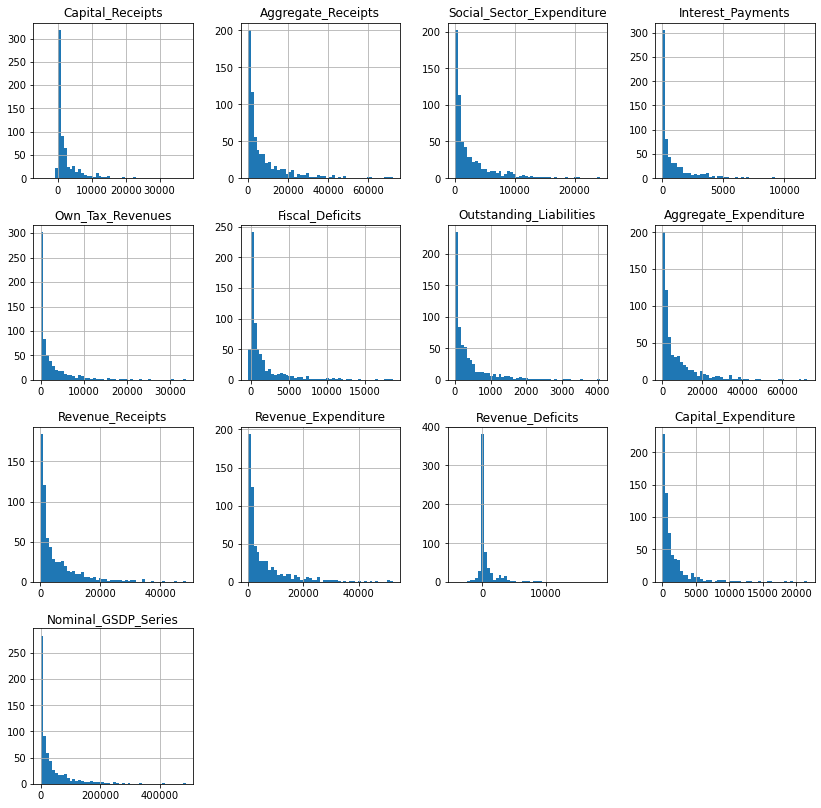

In [32]:
# this functipn is used to plot the histogram
niti.hist(bins=50, figsize=(14, 14))
plt.show()

In [33]:
sns.set(color_codes=True)

## Distribution and Pair Plot

In [46]:
features = niti.columns[0:-1]
target = niti.columns[-1]

array([[<AxesSubplot:xlabel='Capital_Receipts', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Aggregate_Receipts', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Social_Sector_Expenditure', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Interest_Payments', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Own_Tax_Revenues', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Fiscal_Deficits', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Outstanding_Liabilities', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Aggregate_Expenditure', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Revenue_Receipts', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Revenue_Expenditure', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Revenue_Deficits', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Capital_Expenditure', ylabel='Capital_Receipts'>,
        <AxesSubplot:xlabel='Nominal_GSDP_Series', ylabel='

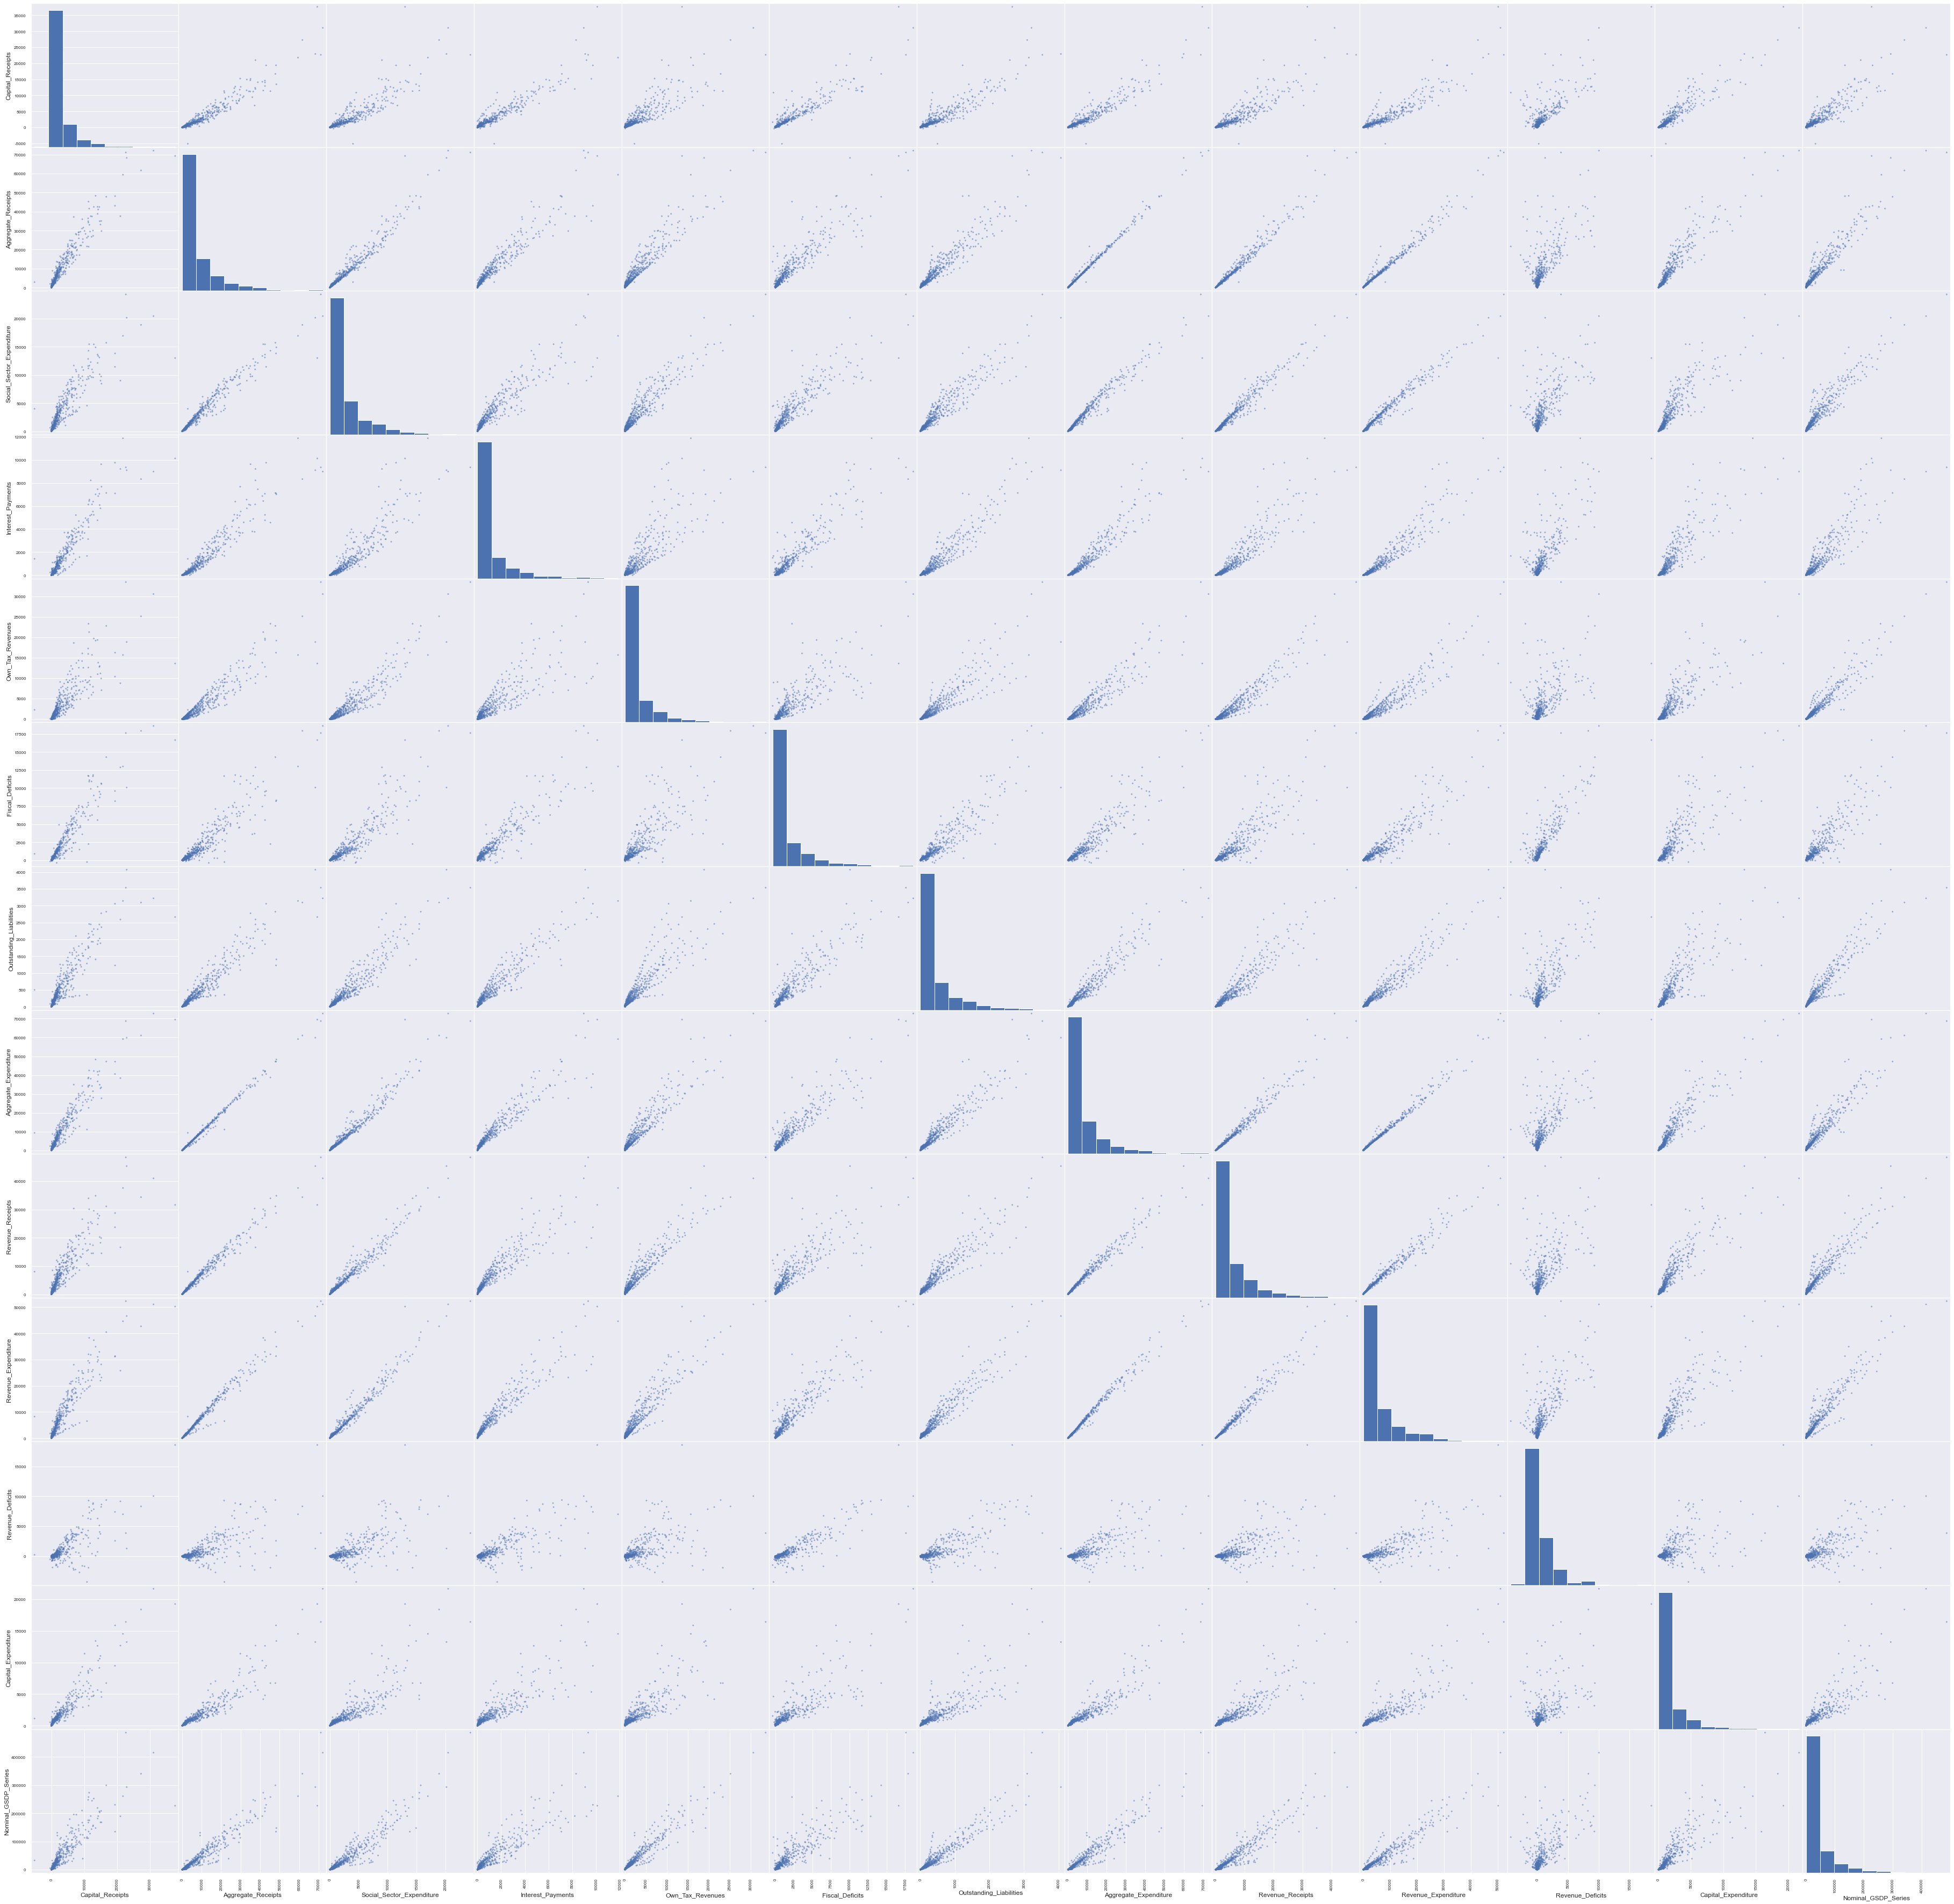

In [49]:
from pandas.plotting import scatter_matrix 
attributes = ["Capital_Receipts", "Aggregate_Receipts", "Social_Sector_Expenditure", "Interest_Payments","Own_Tax_Revenues","Fiscal_Deficits","Outstanding_Liabilities","Aggregate_Expenditure","Revenue_Receipts","Revenue_Expenditure","Revenue_Deficits","Capital_Expenditure","Nominal_GSDP_Series"] 
scatter_matrix(niti[attributes],figsize= (64,64))

## Regression Plots

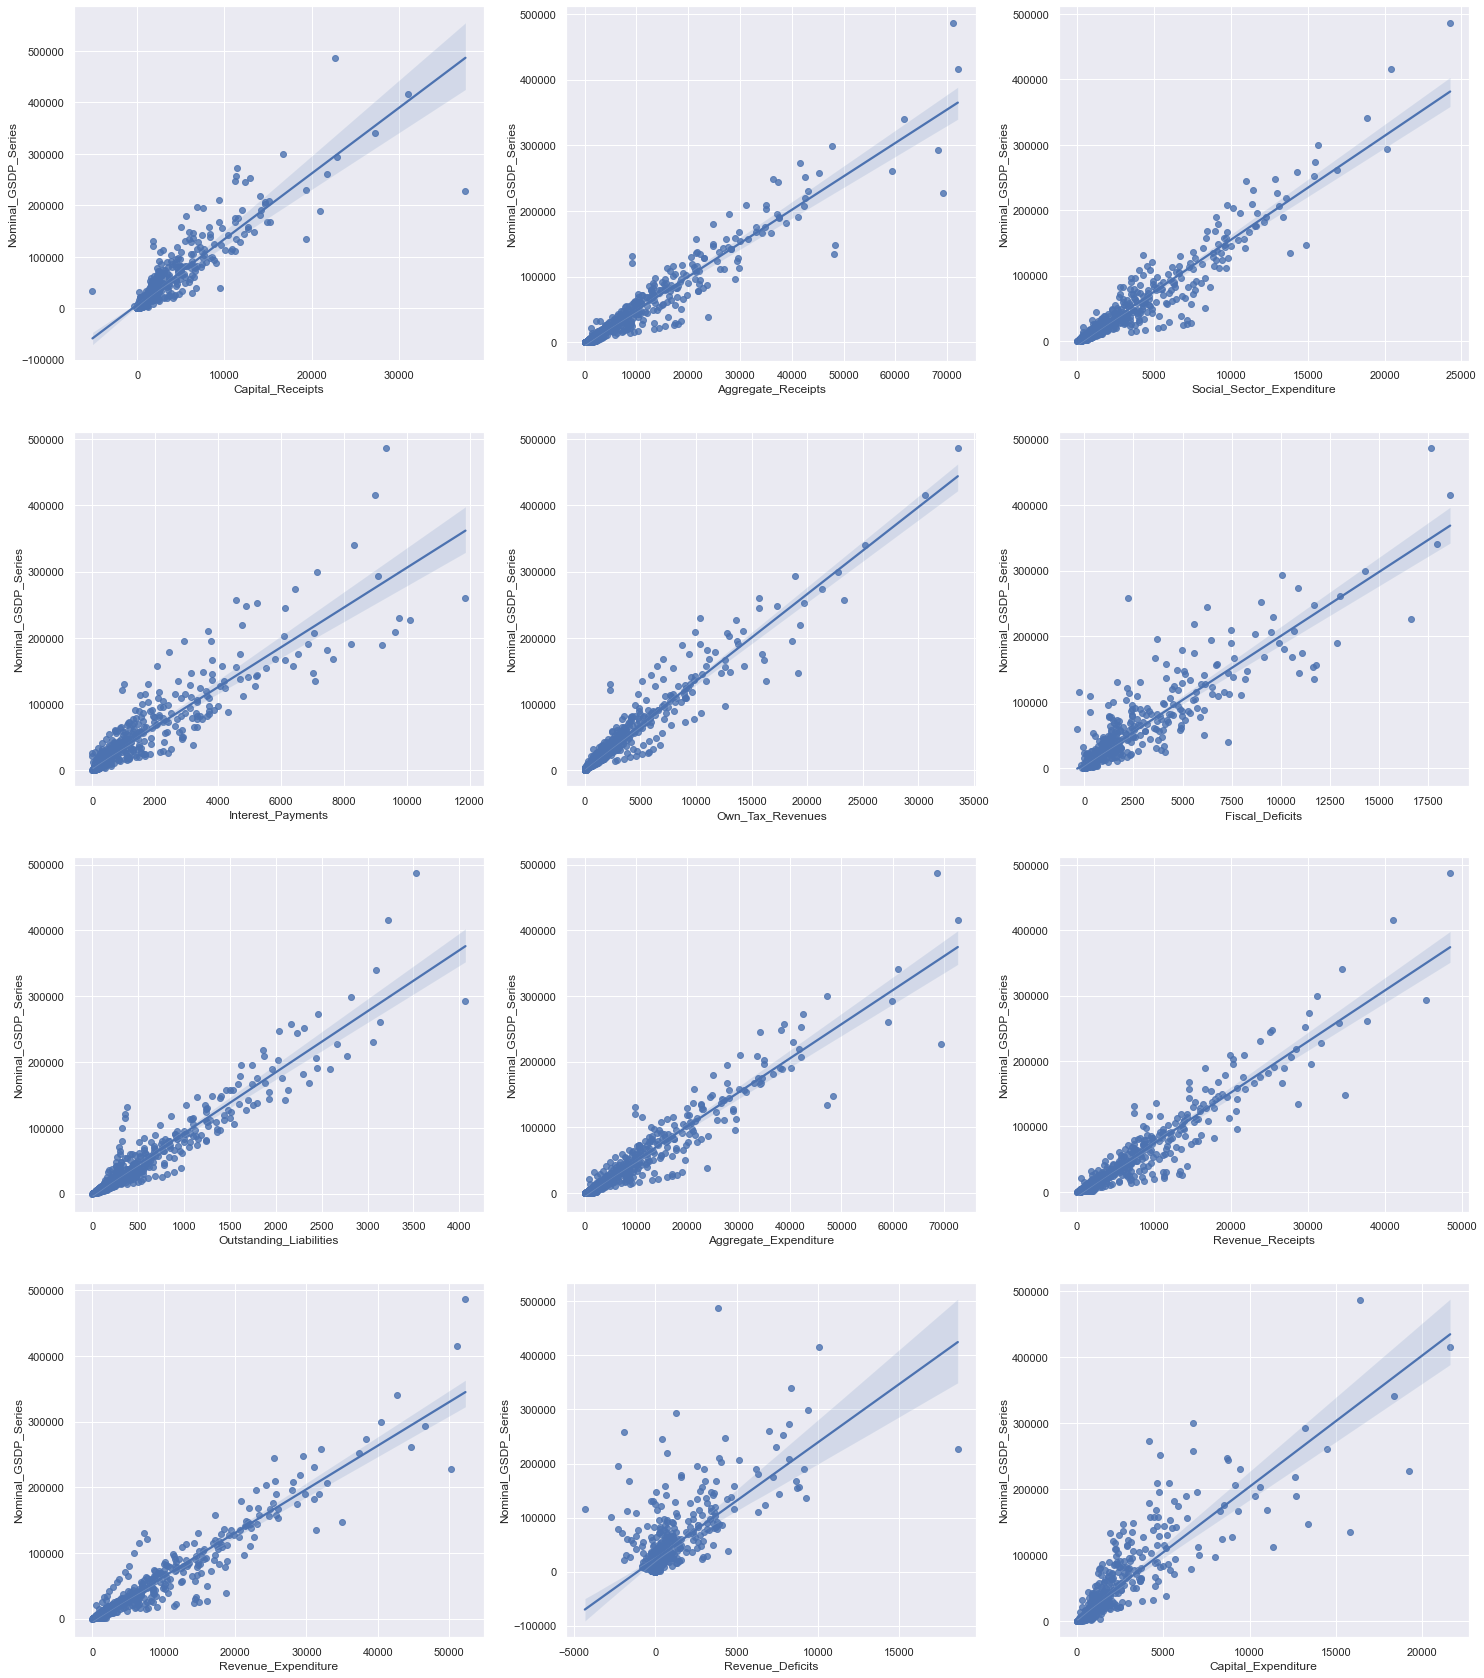

In [50]:
# Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(25, 30))
idx = 0
for row in ax:
    for col in row:
        sns.regplot(data=niti, x=features[idx], y=target, ax=col)
        idx = idx + 1

## Split the Data

In [51]:
# The Sklearn train_test_split function helps us create our training data and test data and its already inbuilt in sklearn
from sklearn.model_selection import train_test_split

In [52]:
# defineing of x in the dataset.
X = niti.iloc[:, 0:-1]

In [53]:
# this is used to print the shape of our dataset.
X.shape

(660, 12)

In [54]:
# this is use to print some of the top entries of our dataset.
X.head()

,Capital_Receipts,Aggregate_Receipts,Social_Sector_Expenditure,Interest_Payments,Own_Tax_Revenues,Fiscal_Deficits,Outstanding_Liabilities,Aggregate_Expenditure,Revenue_Receipts,Revenue_Expenditure,Revenue_Deficits,Capital_Expenditure
0,325.0,1590.0,532.0,81.7,582.0,222.1,81.50,1610.0,1265.0,1161.0,-104.0,449.0
1,187.0,709.0,171.0,30.0,66.0,-27.4,43.41,758.0,522.0,357.0,-165.0,401.0
2,702.0,1690.0,452.0,107.1,277.0,335.8,106.33,1791.0,988.0,929.0,-59.0,862.0
3,345.0,1370.0,406.0,68.6,531.0,246.5,80.76,1442.0,1025.0,903.0,-122.0,539.0
4,116.0,576.0,137.0,37.0,234.0,112.0,30.76,607.0,460.0,401.0,-59.0,207.0


In [55]:
# defining of Y in the dataset.
Y = niti.iloc[:, -1]

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

## Feature Scaling

In [57]:
# StandardScaler removes the mean and scales each feature/variable to unit variance ( it is mainly used for normalisation)
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
# This is use for preprocessing.
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

## Create the Model

In [61]:
# The MLPRegressor is a neural network that can be used to perform regression. “MLP” stands for multi-layer perceptron.
from sklearn.neural_network import MLPRegressor

In [62]:
model = MLPRegressor(hidden_layer_sizes=(12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12), max_iter=5000)

In [63]:
model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12),
             max_iter=5000)

In [64]:
# accuracy of the model of MLP regressor.
model.score(X_test, Y_test)

0.9552068524739735

## Analyze the Model

In [65]:
# metrics mean_squared_error and r2_score is used for measuring the MSE and R-Squared values. Input to this methods are actual values and predicted values
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
Ya = Y_test
Yp = model.predict(X_test)
mse = mean_squared_error(Ya, Yp)
R2 = r2_score(Ya, Yp)

In [67]:
# individal score of MSE and RMSE and R2 used for comparison.
'MSE : {}, RMSE : {}, R2-Score : {}'.format(mse, np.sqrt(mse), R2)

'MSE : 190634398.41185397, RMSE : 13807.041624180538, R2-Score : 0.9552068524739735'

### Save the Model and the Scaler

In [68]:
import pickle

In [69]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [70]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [71]:
import joblib

In [72]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [73]:
mj = joblib.load('model_joblib')

In [75]:
filename = 'gdp_model.sav'
scalerfile = 'gdp_scale.sav'

In [77]:
pickle.dump(model, open(filename, 'wb'))
pickle.dump(scaler, open(scalerfile, 'wb'))

# using JobLib
joblib.dump(model, 'gdp.model')
joblib.dump(scaler, 'gdp.scaler')

['gdp.scaler']

## Load the Model and the Scaler

In [78]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_scaler = pickle.load(open(scalerfile, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9552068524739735


## TIME MODELING

In [80]:
import pandas as pd
from statsmodels.tsa.holtwinters import Holt

In [81]:
data = pd.read_csv('Aggregate_Expenditure.csv', index_col='State')
data.head()

,1980-81,1981-82,1982-83,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,1989-90,...,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
State,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,1610.0,1831.0,1933.0,2588.0,3119.0,3413.0,4068.0,4294.0,5223.0,5768.0,...,74875.0,80803.89,85074.79,100635.64,115881.55,129440.92,136629.27,111067.46,112048.99,NaN
Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,251.0,348.0,326.0,392.0,...,3068.0,4272.59,5236.62,5579.12,6665.17,6353.56,7781.63,11482.51,12712.91,NaN
Assam,758.0,618.0,691.0,942.0,1165.0,1207.0,1586.0,1794.0,1855.0,2266.0,...,15150.0,17485.86,24968.30,25946.97,30268.93,33747.64,37178.40,64979.96,63602.17,NaN
Bihar,1791.0,1871.0,1940.0,2144.0,2408.0,2966.0,3360.0,3914.0,4324.0,5219.0,...,31573.0,37181.25,42796.03,50704.52,60180.03,69206.57,80405.17,132186.89,120685.32,NaN
Chhattisgarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15029.0,17713.97,21558.72,23564.68,28720.69,34819.25,39441.94,55979.35,65810.70,NaN


In [82]:
data.iloc[0, :].head()

1980-81    1610.0
1981-82    1831.0
1982-83    1933.0
1983-84    2588.0
1984-85    3119.0
Name: Andhra Pradesh , dtype: float64

In [83]:
data.iloc[0, :].values

array([  1610.  ,   1831.  ,   1933.  ,   2588.  ,   3119.  ,   3413.  ,
         4068.  ,   4294.  ,   5223.  ,   5768.  ,   6581.  ,   7758.  ,
         8984.  ,  10541.  ,  12459.  ,  14301.  ,  16265.  ,  17745.  ,
        21958.  ,  22767.  ,  28119.  ,  31074.  ,  34373.  ,  40120.  ,
        47153.  ,  48306.  ,  56648.  ,  74875.  ,  80803.89,  85074.79,
       100635.64, 115881.55, 129440.92, 136629.27, 111067.46, 112048.99,
             nan])

In [84]:
years = data.columns.values[1:]
years = list(map(lambda str: str.split('-')[0], years))

In [85]:
years=pd.to_datetime(years, format='%Y')

In [86]:
frame = pd.DataFrame({'year':years, 'Aggregate_Expenditure':data.iloc[0, :].values[1:]}, index=years)

In [87]:
frame.dropna(inplace=True)

In [88]:
fit = Holt(frame['Aggregate_Expenditure']).fit()

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [89]:
fit.predict('2020-01-01')

2020-01-01    130727.221416
Freq: AS-JAN, dtype: float64

In [90]:
fit.predict('2024-01-01')

2024-01-01    145656.570163
Freq: AS-JAN, dtype: float64

In [91]:
fit.predict('2020-01-01')[0]

130727.22141639033

In [92]:
fit.predict('2024-01-01')[0]

145656.57016349875

In [93]:
frame['Aggregate_Expenditure'].tail()

2011-01-01    115881.55
2012-01-01    129440.92
2013-01-01    136629.27
2014-01-01    111067.46
2015-01-01    112048.99
Name: Aggregate_Expenditure, dtype: float64

In [94]:
import glob, os

In [95]:
files = glob.glob('PROCESSED/*.csv')

In [96]:
files = list(filter(lambda str: 'Nominal_GSDP_Series' not in str, files))
files

['PROCESSED/Revenue_Deficits.csv',
 'PROCESSED/Fiscal_Deficits.csv',
 'PROCESSED/Revenue_Receipts.csv',
 'PROCESSED/Interest_Payments.csv',
 'PROCESSED/Aggregate_Receipts.csv',
 'PROCESSED/Own_Tax_Revenues.csv',
 'PROCESSED/Capital_Expenditure.csv',
 'PROCESSED/Capital_Receipts.csv',
 'PROCESSED/Revenue_Expenditure.csv',
 'PROCESSED/Outstanding_Liabilities.csv',
 'PROCESSED/Aggregate_Expenditure.csv',
 'PROCESSED/Social_Sector_Expenditure.csv']

In [97]:
read_files = { os.path.splitext(os.path.basename(file_path))[0] : pd.read_csv(file_path, index_col='State') for file_path in files}

In [98]:
file_names = [os.path.splitext(os.path.basename(file_path))[0] for file_path in files]
file_names

['Revenue_Deficits',
 'Fiscal_Deficits',
 'Revenue_Receipts',
 'Interest_Payments',
 'Aggregate_Receipts',
 'Own_Tax_Revenues',
 'Capital_Expenditure',
 'Capital_Receipts',
 'Revenue_Expenditure',
 'Outstanding_Liabilities',
 'Aggregate_Expenditure',
 'Social_Sector_Expenditure']

In [99]:
states = read_files['Capital_Receipts'].index
states

Index(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'All States', 'Delhi',
       'Puducherry'],
      dtype='object', name='State')

In [100]:
frame = (read_files['Capital_Receipts'])

In [101]:
final_frame = pd.DataFrame(columns=file_names)
for idx, state in enumerate(states):
    state_data = []
    for feature, frame in read_files.items():
        years = list(map(lambda str: str.split('-')[0], frame.columns.values[1:]))
        years = pd.to_datetime(years, format='%Y')
        frame = pd.DataFrame({'Year':years, feature:frame.iloc[idx, :].values[1:]}, index=years)
        frame.dropna(inplace=True)
        try:
            fit = Holt(frame[feature]).fit()
            pred_val = fit.predict('2020-01-01')[0]
        except:
            print('State : {} Feature : {} Data : {}'.format(state, feature, frame[feature]))
        state_data.append(pred_val)
    # print('State : {}, Data : {}'.format(state, state_data))
    final_frame.loc[state] = state_data

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: Convergence

State : Mizoram Feature : Own_Tax_Revenues Data : 1985-01-01      2.0
1987-01-01      4.0
1988-01-01      2.0
1989-01-01      3.0
1990-01-01      0.0
1991-01-01      0.0
1992-01-01     10.0
1993-01-01     10.0
1994-01-01     10.0
1995-01-01     10.0
1996-01-01     10.0
1997-01-01     10.0
1998-01-01     10.0
1999-01-01     10.0
2000-01-01     10.0
2001-01-01     20.0
2002-01-01     30.0
2003-01-01     30.0
2004-01-01     40.0
2005-01-01     60.0
2006-01-01     70.0
2007-01-01     80.0
2008-01-01     90.0
2009-01-01    110.0
2010-01-01    130.0
2011-01-01    180.0
2012-01-01    220.0
2013-01-01    230.0
2014-01-01    270.0
2015-01-01    330.0
Name: Own_Tax_Revenues, dtype: float64


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/b

State : Sikkim Feature : Aggregate_Receipts Data : 1981-01-01      38.00
1983-01-01      71.00
1985-01-01     105.00
1986-01-01     120.00
1987-01-01     134.00
1988-01-01     170.00
1989-01-01     180.00
1990-01-01     193.00
1991-01-01     206.00
1992-01-01     260.00
1993-01-01     252.00
1994-01-01     605.00
1995-01-01     986.00
1996-01-01    1216.00
1997-01-01    1377.00
1998-01-01    1635.00
1999-01-01    1703.00
2000-01-01     958.00
2001-01-01    1950.00
2002-01-01    2193.00
2003-01-01    1456.00
2004-01-01    2245.00
2005-01-01    2083.00
2006-01-01    2290.00
2007-01-01    3067.00
2008-01-01    3107.76
2009-01-01    3819.14
2010-01-01    3132.37
2011-01-01    4042.70
2012-01-01    4052.53
2013-01-01    4674.28
2014-01-01    5032.60
2015-01-01    5606.97
2016-01-01    5736.24
Name: Aggregate_Receipts, dtype: float64
State : Sikkim Feature : Capital_Receipts Data : 1981-01-01     -1.00
1983-01-01     15.00
1985-01-01     13.00
1986-01-01      7.00
1987-01-01      7.00
1988-0

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/li

State : Telangana Feature : Aggregate_Expenditure Data : 2014-01-01     99957.97
2015-01-01    115059.19
Name: Aggregate_Expenditure, dtype: float64


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provide

State : All States Feature : Revenue_Deficits Data : Series([], Name: Revenue_Deficits, dtype: float64)


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 

In [123]:
final_frame = pd.DataFrame(columns=file_names)
for idx, state in enumerate(states):
    state_data = []
    for feature, frame in read_files.items():
        years = list(map(lambda str: str.split('-')[0], frame.columns.values[1:]))
        years = pd.to_datetime(years, format='%Y')
        frame = pd.DataFrame({'Year':years, feature:frame.iloc[idx, :].values[1:]}, index=years)
        frame.dropna(inplace=True)
        try:
            fit = Holt(frame[feature]).fit()
            pred_val = fit.predict('2024-01-01')[0]
        except:
            print('State : {} Feature : {} Data : {}'.format(state, feature, frame[feature]))
        state_data.append(pred_val)
    # print('State : {}, Data : {}'.format(state, state_data))
    final_frame.loc[state] = state_data

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: Convergence

State : Mizoram Feature : Own_Tax_Revenues Data : 1985-01-01     2.00000000
1987-01-01     4.00000000
1988-01-01     2.00000000
1989-01-01     3.00000000
1990-01-01     0.00000000
1991-01-01     0.00000000
1992-01-01    10.00000000
1993-01-01    10.00000000
1994-01-01    10.00000000
1995-01-01    10.00000000
1996-01-01    10.00000000
1997-01-01    10.00000000
1998-01-01    10.00000000
1999-01-01    10.00000000
2000-01-01    10.00000000
2001-01-01    20.00000000
2002-01-01    30.00000000
2003-01-01    30.00000000
2004-01-01    40.00000000
2005-01-01    60.00000000
2006-01-01    70.00000000
2007-01-01    80.00000000
2008-01-01    90.00000000
2009-01-01   110.00000000
2010-01-01   130.00000000
2011-01-01   180.00000000
2012-01-01   220.00000000
2013-01-01   230.00000000
2014-01-01   270.00000000
2015-01-01   330.00000000
Name: Own_Tax_Revenues, dtype: float64


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/b

State : Sikkim Feature : Aggregate_Receipts Data : 1981-01-01     38.00000000
1983-01-01     71.00000000
1985-01-01    105.00000000
1986-01-01    120.00000000
1987-01-01    134.00000000
1988-01-01    170.00000000
1989-01-01    180.00000000
1990-01-01    193.00000000
1991-01-01    206.00000000
1992-01-01    260.00000000
1993-01-01    252.00000000
1994-01-01    605.00000000
1995-01-01    986.00000000
1996-01-01   1216.00000000
1997-01-01   1377.00000000
1998-01-01   1635.00000000
1999-01-01   1703.00000000
2000-01-01    958.00000000
2001-01-01   1950.00000000
2002-01-01   2193.00000000
2003-01-01   1456.00000000
2004-01-01   2245.00000000
2005-01-01   2083.00000000
2006-01-01   2290.00000000
2007-01-01   3067.00000000
2008-01-01   3107.76000000
2009-01-01   3819.14000000
2010-01-01   3132.37000000
2011-01-01   4042.70000000
2012-01-01   4052.53000000
2013-01-01   4674.28000000
2014-01-01   5032.60000000
2015-01-01   5606.97000000
2016-01-01   5736.24000000
Name: Aggregate_Receipts, dtype

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 

State : Telangana Feature : Aggregate_Expenditure Data : 2014-01-01    99957.97000000
2015-01-01   115059.19000000
Name: Aggregate_Expenditure, dtype: float64


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 

State : All States Feature : Revenue_Deficits Data : Series([], Name: Revenue_Deficits, dtype: float64)


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 

In [144]:
final_frame = pd.DataFrame(columns=file_names)
for idx, state in enumerate(states):
    state_data = []
    for feature, frame in read_files.items():
        years = list(map(lambda str: str.split('-')[0], frame.columns.values[1:]))
        years = pd.to_datetime(years, format='%Y')
        frame = pd.DataFrame({'Year':years, feature:frame.iloc[idx, :].values[1:]}, index=years)
        frame.dropna(inplace=True)
        try:
            fit = Holt(frame[feature]).fit()
            pred_val = fit.predict('2026-01-01')[0]
        except:
            print('State : {} Feature : {} Data : {}'.format(state, feature, frame[feature]))
        state_data.append(pred_val)
    # print('State : {}, Data : {}'.format(state, state_data))
    final_frame.loc[state] = state_data

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: Convergence

State : Mizoram Feature : Own_Tax_Revenues Data : 1985-01-01     2.00000000
1987-01-01     4.00000000
1988-01-01     2.00000000
1989-01-01     3.00000000
1990-01-01     0.00000000
1991-01-01     0.00000000
1992-01-01    10.00000000
1993-01-01    10.00000000
1994-01-01    10.00000000
1995-01-01    10.00000000
1996-01-01    10.00000000
1997-01-01    10.00000000
1998-01-01    10.00000000
1999-01-01    10.00000000
2000-01-01    10.00000000
2001-01-01    20.00000000
2002-01-01    30.00000000
2003-01-01    30.00000000
2004-01-01    40.00000000
2005-01-01    60.00000000
2006-01-01    70.00000000
2007-01-01    80.00000000
2008-01-01    90.00000000
2009-01-01   110.00000000
2010-01-01   130.00000000
2011-01-01   180.00000000
2012-01-01   220.00000000
2013-01-01   230.00000000
2014-01-01   270.00000000
2015-01-01   330.00000000
Name: Own_Tax_Revenues, dtype: float64


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/b

State : Sikkim Feature : Aggregate_Receipts Data : 1981-01-01     38.00000000
1983-01-01     71.00000000
1985-01-01    105.00000000
1986-01-01    120.00000000
1987-01-01    134.00000000
1988-01-01    170.00000000
1989-01-01    180.00000000
1990-01-01    193.00000000
1991-01-01    206.00000000
1992-01-01    260.00000000
1993-01-01    252.00000000
1994-01-01    605.00000000
1995-01-01    986.00000000
1996-01-01   1216.00000000
1997-01-01   1377.00000000
1998-01-01   1635.00000000
1999-01-01   1703.00000000
2000-01-01    958.00000000
2001-01-01   1950.00000000
2002-01-01   2193.00000000
2003-01-01   1456.00000000
2004-01-01   2245.00000000
2005-01-01   2083.00000000
2006-01-01   2290.00000000
2007-01-01   3067.00000000
2008-01-01   3107.76000000
2009-01-01   3819.14000000
2010-01-01   3132.37000000
2011-01-01   4042.70000000
2012-01-01   4052.53000000
2013-01-01   4674.28000000
2014-01-01   5032.60000000
2015-01-01   5606.97000000
2016-01-01   5736.24000000
Name: Aggregate_Receipts, dtype

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provide

State : Telangana Feature : Aggregate_Expenditure Data : 2014-01-01    99957.97000000
2015-01-01   115059.19000000
Name: Aggregate_Expenditure, dtype: float64


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: Convergence

State : All States Feature : Revenue_Deficits Data : Series([], Name: Revenue_Deficits, dtype: float64)


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 

In [159]:
final_frame = pd.DataFrame(columns=file_names)
for idx, state in enumerate(states):
    state_data = []
    for feature, frame in read_files.items():
        years = list(map(lambda str: str.split('-')[0], frame.columns.values[1:]))
        years = pd.to_datetime(years, format='%Y')
        frame = pd.DataFrame({'Year':years, feature:frame.iloc[idx, :].values[1:]}, index=years)
        frame.dropna(inplace=True)
        try:
            fit = Holt(frame[feature]).fit()
            pred_val = fit.predict('2028-01-01')[0]
        except:
            print('State : {} Feature : {} Data : {}'.format(state, feature, frame[feature]))
        state_data.append(pred_val)
    # print('State : {}, Data : {}'.format(state, state_data))
    final_frame.loc[state] = state_data

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: Convergence

State : Mizoram Feature : Own_Tax_Revenues Data : 1985-01-01     2.00000000
1987-01-01     4.00000000
1988-01-01     2.00000000
1989-01-01     3.00000000
1990-01-01     0.00000000
1991-01-01     0.00000000
1992-01-01    10.00000000
1993-01-01    10.00000000
1994-01-01    10.00000000
1995-01-01    10.00000000
1996-01-01    10.00000000
1997-01-01    10.00000000
1998-01-01    10.00000000
1999-01-01    10.00000000
2000-01-01    10.00000000
2001-01-01    20.00000000
2002-01-01    30.00000000
2003-01-01    30.00000000
2004-01-01    40.00000000
2005-01-01    60.00000000
2006-01-01    70.00000000
2007-01-01    80.00000000
2008-01-01    90.00000000
2009-01-01   110.00000000
2010-01-01   130.00000000
2011-01-01   180.00000000
2012-01-01   220.00000000
2013-01-01   230.00000000
2014-01-01   270.00000000
2015-01-01   330.00000000
Name: Own_Tax_Revenues, dtype: float64


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/b

State : Sikkim Feature : Aggregate_Receipts Data : 1981-01-01     38.00000000
1983-01-01     71.00000000
1985-01-01    105.00000000
1986-01-01    120.00000000
1987-01-01    134.00000000
1988-01-01    170.00000000
1989-01-01    180.00000000
1990-01-01    193.00000000
1991-01-01    206.00000000
1992-01-01    260.00000000
1993-01-01    252.00000000
1994-01-01    605.00000000
1995-01-01    986.00000000
1996-01-01   1216.00000000
1997-01-01   1377.00000000
1998-01-01   1635.00000000
1999-01-01   1703.00000000
2000-01-01    958.00000000
2001-01-01   1950.00000000
2002-01-01   2193.00000000
2003-01-01   1456.00000000
2004-01-01   2245.00000000
2005-01-01   2083.00000000
2006-01-01   2290.00000000
2007-01-01   3067.00000000
2008-01-01   3107.76000000
2009-01-01   3819.14000000
2010-01-01   3132.37000000
2011-01-01   4042.70000000
2012-01-01   4052.53000000
2013-01-01   4674.28000000
2014-01-01   5032.60000000
2015-01-01   5606.97000000
2016-01-01   5736.24000000
Name: Aggregate_Receipts, dtype

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provide

State : Telangana Feature : Aggregate_Expenditure Data : 2014-01-01    99957.97000000
2015-01-01   115059.19000000
Name: Aggregate_Expenditure, dtype: float64


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 

State : All States Feature : Revenue_Deficits Data : Series([], Name: Revenue_Deficits, dtype: float64)


/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/b

In [124]:
final_frame

,Revenue_Deficits,Fiscal_Deficits,Revenue_Receipts,Interest_Payments,Aggregate_Receipts,Own_Tax_Revenues,Capital_Expenditure,Capital_Receipts,Revenue_Expenditure,Outstanding_Liabilities,Aggregate_Expenditure,Social_Sector_Expenditure
Andhra Pradesh,11636.44184576,27264.40822667,149794.50980833,15569.70574657,179223.21497938,55044.59681755,14414.03171196,38057.57725135,93208.22362355,2039.83963780,145656.57016350,75832.24702414
Arunachal Pradesh,-938.02295876,1738.26379278,25376.94994386,616.09115762,25739.09552981,1013.00130963,6060.77840123,1269.05949949,21521.78885467,72.14071479,25922.96141755,9568.77154607
Assam,-891.29429641,8322.84537122,228255.58951465,4806.18906654,230466.16468436,28990.31399046,36074.74375438,10182.42057124,120749.17176367,980.14688384,156224.57018849,75948.82191286
Bihar,-9338.74132496,25805.15995606,250846.35350296,16316.86571834,298861.29420851,78962.88401554,73427.10021107,29024.83559028,218312.87585402,2599.75945397,292997.95601750,146143.00576122
Chhattisgarh,-8555.66073908,9041.41053844,145548.81394354,6573.41107487,162096.72470589,43390.29753352,26149.48792115,13656.66867582,141214.48559805,1068.20000062,173089.59587362,106611.79615364
Goa,-144.43337824,7012.63699963,22747.89567660,2061.00066244,27505.80003898,7599.88168131,16120.78045814,4565.97380243,23588.32769904,294.24865922,39845.00987796,12600.00006169
Gujarat,-6827.25793263,28877.71998221,209615.64516510,27247.87786260,277697.14569661,121973.93839346,59636.56378941,48678.79394867,208813.96424852,4267.67969351,271528.77393541,124730.66803398
Haryana,14167.61573024,24867.43921944,129344.85292028,28101.34335771,188005.86127166,66222.84410082,15104.52399462,58043.01231369,143566.33340471,3359.08731770,157517.22238923,68930.92557885
Himachal Pradesh,906.20181820,4532.73394071,45506.07626433,5748.63403213,63074.31912892,11637.43253588,7283.47858999,7332.43060143,49928.59035222,754.73802939,54074.30896124,26703.79123903
Jammu & Kashmir,-3920.64709506,12100.66388404,127252.47742461,8543.74525469,164412.42791179,15178.07899413,16569.96276400,17097.43002566,66246.66698699,1256.35743379,88079.57266347,29364.10312769


In [102]:
final_frame

,Revenue_Deficits,Fiscal_Deficits,Revenue_Receipts,Interest_Payments,Aggregate_Receipts,Own_Tax_Revenues,Capital_Expenditure,Capital_Receipts,Revenue_Expenditure,Outstanding_Liabilities,Aggregate_Expenditure,Social_Sector_Expenditure
Andhra Pradesh,10081.189634,23605.814688,1.295052e+05,13908.351710,1.566078e+05,5.024558e+04,14480.143736,33769.865256,9.508436e+04,1807.229482,1.307272e+05,6.528858e+04
Arunachal Pradesh,-839.364336,1555.118403,1.907635e+04,552.227418,1.980640e+04,7.979046e+02,4712.376525,1130.987620,1.611683e+04,63.181936,2.005252e+04,7.106791e+03
Assam,-791.470634,7540.917808,1.468072e+05,3982.739657,1.518798e+05,2.183287e+04,25400.834782,9284.450521,9.015112e+04,727.973442,1.151665e+05,5.462185e+04
Bihar,-7751.673792,21659.698892,1.831413e+05,12218.070333,2.179643e+05,5.759706e+04,54147.739838,24501.072979,1.640959e+05,1955.064858,2.190670e+05,1.077337e+05
Chhattisgarh,-6629.657250,8063.005849,1.040215e+05,4574.628381,1.168607e+05,3.306663e+04,19392.109067,11620.919319,1.024987e+05,763.000000,1.253901e+05,7.583565e+04
Goa,-129.108221,5005.782423,1.669363e+04,1629.777721,2.025283e+04,6.150069e+03,10543.043701,3372.800454,1.733877e+04,233.539964,2.795957e+04,9.080000e+03
Gujarat,-7039.628213,25783.886673,1.629890e+05,22357.737489,2.133333e+05,9.817034e+04,48923.537470,41215.569982,1.613767e+05,3366.182775,2.120532e+05,9.505394e+04
Haryana,12105.161435,21089.722538,9.614775e+04,19293.538285,1.381859e+05,5.156901e+04,12635.651700,42452.594135,1.071982e+05,2403.398564,1.189125e+05,5.160476e+04
Himachal Pradesh,818.875251,4080.024155,3.589025e+04,4573.079645,4.744697e+04,9.278812e+03,6135.176958,6481.780518,3.806640e+04,605.019015,4.234968e+04,1.980929e+04
Jammu & Kashmir,-3563.788862,9689.403496,8.885632e+04,6482.127653,1.124194e+05,1.187805e+04,13600.596799,13044.776893,5.223133e+04,946.264978,6.883531e+04,2.255702e+04


In [103]:
final_frame.to_csv('NITI_2020_DATA.csv', index=True)

In [104]:
data = pd.read_csv('NITI_2020_DATA.csv', index_col=0)
data

,Revenue_Deficits,Fiscal_Deficits,Revenue_Receipts,Interest_Payments,Aggregate_Receipts,Own_Tax_Revenues,Capital_Expenditure,Capital_Receipts,Revenue_Expenditure,Outstanding_Liabilities,Aggregate_Expenditure,Social_Sector_Expenditure
Andhra Pradesh,10081.189634,23605.814688,1.295052e+05,13908.351710,1.566078e+05,5.024558e+04,14480.143736,33769.865256,9.508436e+04,1807.229482,1.307272e+05,6.528858e+04
Arunachal Pradesh,-839.364336,1555.118403,1.907635e+04,552.227418,1.980640e+04,7.979046e+02,4712.376525,1130.987620,1.611683e+04,63.181936,2.005252e+04,7.106791e+03
Assam,-791.470634,7540.917808,1.468072e+05,3982.739657,1.518798e+05,2.183287e+04,25400.834782,9284.450521,9.015112e+04,727.973442,1.151665e+05,5.462185e+04
Bihar,-7751.673792,21659.698892,1.831413e+05,12218.070333,2.179643e+05,5.759706e+04,54147.739838,24501.072979,1.640959e+05,1955.064858,2.190670e+05,1.077337e+05
Chhattisgarh,-6629.657250,8063.005849,1.040215e+05,4574.628381,1.168607e+05,3.306663e+04,19392.109067,11620.919319,1.024987e+05,763.000000,1.253901e+05,7.583565e+04
Goa,-129.108221,5005.782423,1.669363e+04,1629.777721,2.025283e+04,6.150069e+03,10543.043701,3372.800454,1.733877e+04,233.539964,2.795957e+04,9.080000e+03
Gujarat,-7039.628213,25783.886673,1.629890e+05,22357.737489,2.133333e+05,9.817034e+04,48923.537470,41215.569982,1.613767e+05,3366.182775,2.120532e+05,9.505394e+04
Haryana,12105.161435,21089.722538,9.614775e+04,19293.538285,1.381859e+05,5.156901e+04,12635.651700,42452.594135,1.071982e+05,2403.398564,1.189125e+05,5.160476e+04
Himachal Pradesh,818.875251,4080.024155,3.589025e+04,4573.079645,4.744697e+04,9.278812e+03,6135.176958,6481.780518,3.806640e+04,605.019015,4.234968e+04,1.980929e+04
Jammu & Kashmir,-3563.788862,9689.403496,8.885632e+04,6482.127653,1.124194e+05,1.187805e+04,13600.596799,13044.776893,5.223133e+04,946.264978,6.883531e+04,2.255702e+04


In [125]:
final_frame.to_csv('NITI_2024_DATA.csv', index=True)

In [126]:
data = pd.read_csv('NITI_2024_DATA.csv', index_col=0)
data

,Revenue_Deficits,Fiscal_Deficits,Revenue_Receipts,Interest_Payments,Aggregate_Receipts,Own_Tax_Revenues,Capital_Expenditure,Capital_Receipts,Revenue_Expenditure,Outstanding_Liabilities,Aggregate_Expenditure,Social_Sector_Expenditure
Andhra Pradesh,11636.44184576,27264.40822667,149794.50980833,15569.70574657,179223.21497938,55044.59681755,14414.03171196,38057.57725135,93208.22362355,2039.83963780,145656.57016350,75832.24702414
Arunachal Pradesh,-938.02295876,1738.26379278,25376.94994386,616.09115762,25739.09552981,1013.00130963,6060.77840123,1269.05949949,21521.78885467,72.14071479,25922.96141755,9568.77154607
Assam,-891.29429641,8322.84537122,228255.58951465,4806.18906654,230466.16468436,28990.31399046,36074.74375438,10182.42057124,120749.17176367,980.14688384,156224.57018849,75948.82191286
Bihar,-9338.74132496,25805.15995606,250846.35350296,16316.86571834,298861.29420851,78962.88401554,73427.10021107,29024.83559028,218312.87585402,2599.75945397,292997.95601750,146143.00576122
Chhattisgarh,-8555.66073908,9041.41053844,145548.81394354,6573.41107487,162096.72470589,43390.29753352,26149.48792115,13656.66867582,141214.48559805,1068.20000062,173089.59587362,106611.79615364
Goa,-144.43337824,7012.63699963,22747.89567660,2061.00066244,27505.80003898,7599.88168131,16120.78045814,4565.97380243,23588.32769904,294.24865922,39845.00987796,12600.00006169
Gujarat,-6827.25793263,28877.71998221,209615.64516510,27247.87786260,277697.14569661,121973.93839346,59636.56378941,48678.79394867,208813.96424852,4267.67969351,271528.77393541,124730.66803398
Haryana,14167.61573024,24867.43921944,129344.85292028,28101.34335771,188005.86127166,66222.84410082,15104.52399462,58043.01231369,143566.33340471,3359.08731770,157517.22238923,68930.92557885
Himachal Pradesh,906.20181820,4532.73394071,45506.07626433,5748.63403213,63074.31912892,11637.43253588,7283.47858999,7332.43060143,49928.59035222,754.73802939,54074.30896124,26703.79123903
Jammu & Kashmir,-3920.64709506,12100.66388404,127252.47742461,8543.74525469,164412.42791179,15178.07899413,16569.96276400,17097.43002566,66246.66698699,1256.35743379,88079.57266347,29364.10312769


In [145]:
final_frame.to_csv('NITI_2026_DATA.csv', index=True)

In [146]:
data = pd.read_csv('NITI_2026_DATA.csv', index_col=0)
data

,Revenue_Deficits,Fiscal_Deficits,Revenue_Receipts,Interest_Payments,Aggregate_Receipts,Own_Tax_Revenues,Capital_Expenditure,Capital_Receipts,Revenue_Expenditure,Outstanding_Liabilities,Aggregate_Expenditure,Social_Sector_Expenditure
Andhra Pradesh,12414.06795178,29093.70499588,159939.17637106,16400.38276465,190530.91421564,57444.10582778,14380.97569999,40201.43324879,92270.15689647,2156.14471561,153121.24453705,81104.08066272
Arunachal Pradesh,-987.35226992,1829.83648757,28527.25231270,648.02302759,28705.44471559,1120.54968839,6734.97933918,1338.09543937,24224.26774129,76.62010433,28858.18410225,10799.76170999
Assam,-941.20612759,8713.80915291,268979.80777900,5217.91377145,269759.33339973,32569.03772266,41411.69824058,10631.40559659,136048.20001588,1106.23360482,176753.61971012,86612.30672994
Bihar,-10132.27509122,27877.89048830,284698.89819377,18366.26341108,339309.80949606,89645.79479663,83066.78039740,31286.71689607,245421.35078544,2922.10675212,329963.44956691,165347.64317964
Chhattisgarh,-9518.66248345,9530.61288305,166312.44838137,7572.80242169,184714.76173725,48552.13377801,29528.17734847,14674.54335402,160572.39375524,1220.80000080,196939.35297376,121999.86970570
Goa,-152.09595705,8016.06428793,25775.02825639,2276.61213334,31132.28732591,8324.78802321,18909.64883668,5162.56047680,26713.10674699,324.60300683,45787.72985412,14360.00007540
Gujarat,-6721.07279261,30424.63663687,232928.94986312,29692.94804935,309879.04658364,133875.73833436,64993.07694902,52410.40593182,232532.60633733,4718.42815299,301266.55703005,139569.03274371
Haryana,15198.84287807,26756.29755996,145943.40328683,32505.24589399,212915.84666596,73549.76035694,16338.96014216,65838.22140324,161750.39323295,3836.93169472,176819.56394576,77594.00818255
Himachal Pradesh,949.86510193,4759.08883359,50313.98703614,6336.41122577,70887.99518477,12816.74303543,7857.62940587,7757.75564299,55859.68406884,829.59753675,59936.62284531,30151.04300469
Jammu & Kashmir,-4099.07621160,13306.29407817,146450.55426718,9574.55405562,190408.96294445,16828.09289050,18054.64574643,19123.75659202,73254.33772031,1411.40366160,97701.70293737,32767.64456265


In [160]:
final_frame

,Revenue_Deficits,Fiscal_Deficits,Revenue_Receipts,Interest_Payments,Aggregate_Receipts,Own_Tax_Revenues,Capital_Expenditure,Capital_Receipts,Revenue_Expenditure,Outstanding_Liabilities,Aggregate_Expenditure,Social_Sector_Expenditure
Andhra Pradesh,13191.69405780,30923.00176510,170083.84293380,17231.05978274,201838.61345190,59843.61483801,14347.91968803,42345.28924624,91332.09016939,2272.44979343,160585.91891061,86375.91430129
Arunachal Pradesh,-1036.68158108,1921.40918235,31677.55468155,679.95489756,31671.79390137,1228.09806714,7409.18027713,1407.13137925,26926.74662791,81.09949387,31793.40678694,12030.75187390
Assam,-991.11795878,9104.77293460,309704.02604335,5629.63847636,309052.50211509,36147.76145485,46748.65272678,11080.39062195,151347.22826810,1232.32032580,197282.66923175,97275.79154701
Bihar,-10925.80885748,29950.62102053,318551.44288458,20415.66110383,379758.32478360,100328.70557772,92706.46058373,33548.59820186,272529.82571686,3244.45405027,366928.94311632,184552.28059806
Chhattisgarh,-10481.66422782,10019.81522766,187076.08281920,8572.19376852,207332.79876861,53713.97002250,32906.86677579,15692.41803221,179930.30191244,1373.40000097,220789.11007389,137387.94325776
Goa,-159.75853587,9019.49157623,28802.16083618,2492.22360423,34758.77461283,9049.69436510,21698.51721521,5759.14715117,29837.88579495,354.95735444,51730.44983028,16120.00008911
Gujarat,-6614.88765259,31971.55329153,256242.25456114,32138.01823611,342060.94747066,145777.53827526,70349.59010863,56142.01791497,256251.24842615,5169.17661248,331004.34012468,154407.39745344
Haryana,16230.07002590,28645.15590048,162541.95365337,36909.14843027,237825.83206025,80876.67661306,17573.39628970,73633.43049279,179934.45306120,4314.77607175,196121.90550230,86257.09078625
Himachal Pradesh,993.52838567,4985.44372647,55121.89780796,6924.18841941,78701.67124062,13996.05353497,8431.78022176,8183.08068456,61790.77778545,904.45704410,65798.93672937,33598.29477036
Jammu & Kashmir,-4277.50532814,14511.92427231,165648.63110974,10605.36285655,216405.49797712,18478.10678686,19539.32872885,21150.08315839,80262.00845363,1566.44988942,107323.83321128,36171.18599761


In [161]:
final_frame.to_csv('NITI_2028_DATA.csv', index=True)

In [162]:
data = pd.read_csv('NITI_2028_DATA.csv', index_col=0)
data

,Revenue_Deficits,Fiscal_Deficits,Revenue_Receipts,Interest_Payments,Aggregate_Receipts,Own_Tax_Revenues,Capital_Expenditure,Capital_Receipts,Revenue_Expenditure,Outstanding_Liabilities,Aggregate_Expenditure,Social_Sector_Expenditure
Andhra Pradesh,13191.69405780,30923.00176510,170083.84293380,17231.05978274,201838.61345190,59843.61483801,14347.91968803,42345.28924624,91332.09016939,2272.44979343,160585.91891061,86375.91430129
Arunachal Pradesh,-1036.68158108,1921.40918235,31677.55468155,679.95489756,31671.79390137,1228.09806714,7409.18027713,1407.13137925,26926.74662791,81.09949387,31793.40678694,12030.75187390
Assam,-991.11795878,9104.77293460,309704.02604335,5629.63847636,309052.50211509,36147.76145485,46748.65272678,11080.39062195,151347.22826810,1232.32032580,197282.66923175,97275.79154701
Bihar,-10925.80885748,29950.62102053,318551.44288458,20415.66110383,379758.32478360,100328.70557772,92706.46058373,33548.59820186,272529.82571686,3244.45405027,366928.94311632,184552.28059806
Chhattisgarh,-10481.66422782,10019.81522766,187076.08281920,8572.19376852,207332.79876861,53713.97002250,32906.86677579,15692.41803221,179930.30191244,1373.40000097,220789.11007389,137387.94325776
Goa,-159.75853587,9019.49157623,28802.16083618,2492.22360423,34758.77461283,9049.69436510,21698.51721521,5759.14715117,29837.88579495,354.95735444,51730.44983028,16120.00008911
Gujarat,-6614.88765259,31971.55329153,256242.25456114,32138.01823611,342060.94747066,145777.53827526,70349.59010863,56142.01791497,256251.24842615,5169.17661248,331004.34012468,154407.39745344
Haryana,16230.07002590,28645.15590048,162541.95365337,36909.14843027,237825.83206025,80876.67661306,17573.39628970,73633.43049279,179934.45306120,4314.77607175,196121.90550230,86257.09078625
Himachal Pradesh,993.52838567,4985.44372647,55121.89780796,6924.18841941,78701.67124062,13996.05353497,8431.78022176,8183.08068456,61790.77778545,904.45704410,65798.93672937,33598.29477036
Jammu & Kashmir,-4277.50532814,14511.92427231,165648.63110974,10605.36285655,216405.49797712,18478.10678686,19539.32872885,21150.08315839,80262.00845363,1566.44988942,107323.83321128,36171.18599761


## Load the Model

In [133]:
data.index.values

array(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All States', 'Delhi', 'Puducherry'],
      dtype=object)

In [134]:
import numpy as np
from sklearn.metrics import class_likelihood_ratios

## GDP 2020 Prediction, for Each State and All India

In [135]:
import pickle

In [136]:
filename = 'gdp_model.sav'
scalerfile = 'gdp_scale.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_scaler = pickle.load(open(scalerfile, 'rb'))

In [137]:
predicted_data = []
for state in data.iterrows():
    scaled = loaded_scaler.transform(state[1].values.reshape(1, -1))
    predicted = loaded_model.predict(scaled)
    predicted_data.append(predicted[0])

/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/manavanandani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [138]:
predicted_frame = pd.DataFrame({'State':data.index.values, 'GDP_PREDICTED_2020':predicted_data})

In [139]:
pd.set_option('display.float_format', lambda x: '%.8f' %x)

In [152]:
predicted_frame = pd.DataFrame({'State':data.index.values, 'GDP_PREDICTED_2026':predicted_data})

In [153]:
pd.set_option('display.float_format', lambda x: '%.8f' %x)

## Final Predicted GDP for 2020

In [154]:
predicted_frame

,State,GDP_PREDICTED_2026
0,Andhra Pradesh,1614209.85820374
1,Arunachal Pradesh,357532.15838864
2,Assam,2814051.84385833
3,Bihar,4523785.13622511
4,Chhattisgarh,1780012.75823387
5,Goa,786673.02120974
6,Gujarat,4023251.50904083
7,Haryana,1657014.43523787
8,Himachal Pradesh,593548.82650241
9,Jammu & Kashmir,1646162.10996178


In [155]:
predicted_frame = pd.DataFrame({'State':data.index.values, 'GDP_PREDICTED_2026':predicted_data})

In [156]:
pd.set_option('display.float_format', lambda x: '%.8f' %x)

In [157]:
predicted_frame

,State,GDP_PREDICTED_2026
0,Andhra Pradesh,1614209.85820374
1,Arunachal Pradesh,357532.15838864
2,Assam,2814051.84385833
3,Bihar,4523785.13622511
4,Chhattisgarh,1780012.75823387
5,Goa,786673.02120974
6,Gujarat,4023251.50904083
7,Haryana,1657014.43523787
8,Himachal Pradesh,593548.82650241
9,Jammu & Kashmir,1646162.10996178
